### Phase Circles

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import UnitarySimulator

In [84]:
def circuit():
    n =2
    q = QuantumRegister(n)
    cir = QuantumCircuit(q)
    cir.h(q[0])
    cir.h(q[1])
    return cir

In [85]:
def draw(circ):
    circ = circuit()
    style = {'backgroundcolor': 'lightgreen'}
    circ.draw(output='mpl', style = style)

In [86]:
def getU(circ):
    simulator = Aer.get_backend('unitary_simulator')
    result = execute(circ, simulator).result()
    U = result.get_unitary(circ)
    return U

U = getU(circ)
print(U)

[[ 0.5+0.0000000e+00j  0.5-6.1232340e-17j  0.5-6.1232340e-17j
   0.5-1.2246468e-16j]
 [ 0.5+0.0000000e+00j -0.5+6.1232340e-17j  0.5-6.1232340e-17j
  -0.5+1.2246468e-16j]
 [ 0.5+0.0000000e+00j  0.5-6.1232340e-17j -0.5+6.1232340e-17j
  -0.5+1.2246468e-16j]
 [ 0.5+0.0000000e+00j -0.5+6.1232340e-17j -0.5+6.1232340e-17j
   0.5-1.2246468e-16j]]


In [250]:
def getP(U,u):
    v = np.dot(U,u)
    vn = v/np.sqrt(np.dot(v.T,v))
    P = [0 for i in range(len(vn))]
    for i in range(len(vn)):
        if abs(vn[i].imag) == 0 and abs(vn[i].real) ==0:
            P[i] = "NA"
            vn[i] = 0.0+0.j
        #if abs(vn[i].imag)< 1e-5 and abs(vn[i].real)< 1e-5:
        #    P[i] = "NA"
        #    vn[i] = 0.0+0.j
        elif abs(vn[i].imag)> 1e-10 and abs(vn[i].real)> 1e-10:
            P[i] = np.arctan(vn[i].imag/vn[i].real)[0,0] 
    return vn,P

In [251]:
U = getU(circ)
u = np.matrix([1,0,0,0]).T
vn,P = getP(U,u)
print(vn,P)

[[0.5+0.j]
 [0.5+0.j]
 [0.5+0.j]
 [0.5+0.j]] [0, 0, 0, 0]


#### Draw circle

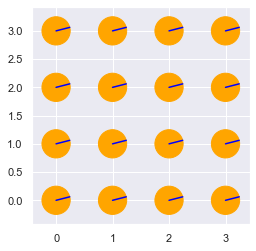

In [252]:
t = 0.25
r = 0.25
for i in range(4):
    x0 = i
    for j in range(4):
        y0 = j
        ax=plt.gca()
        circle= plt.Circle((x0,y0), radius= r, color = 'orange')
        line = plt.plot((x0,x0+r*np.cos(t)),(y0,y0+r*np.sin(t)),color = "blue")
        ax.add_patch(circle)
        plt.axis('scaled')
        
plt.show()

--------

In [253]:
def circuit1():
    n =2
    q = QuantumRegister(n)
    cir = QuantumCircuit(q)
    return cir
def circuit2():
    n =2
    q = QuantumRegister(n)
    cir = QuantumCircuit(q)
    cir.h(q[0])
    cir.x(q[1])
    return cir
def circuit3():
    n =2
    q = QuantumRegister(n)
    cir = QuantumCircuit(q)
    cir.x(q[0])
    cir.swap(q[1],q[0])
    cir.sdg(q[0])
    cir.cx(q[1],q[0])
    return cir
def circuit4():
    n =2
    q = QuantumRegister(n)
    cir = QuantumCircuit(q)
    cir.sdg(q[0])
    cir.h(q[1])
    cir.swap(q[0],q[1])
    cir.z(q[1])
    cir.cx(q[0],q[1])
    cir.y(q[1])
    return cir

In [254]:
U1 = getU(circuit1())
U2 = getU(circuit2())
U3 = getU(circuit3())
U4 = getU(circuit4())
U5 = getU(circuit1())
U6 = getU(circuit2())
U7 = getU(circuit3())
U8 = getU(circuit4())

u = np.matrix([0,0,0,1]).T

v1,P1 =  getP(U1,u)
v2,P2 =  getP(U2,u)
v3,P3 =  getP(U3,u)
v4,P4 =  getP(U4,u)
v5,P5 =  getP(U5,u)
v6,P6 =  getP(U6,u)
v7,P7 =  getP(U7,u)
v8,P8 =  getP(U8,u)

PP = [P1,P2,P3,P4,P5,P6,P7,P8]

In [255]:
v1,v2,v3,v4,v5,v6,v7,v8

(matrix([[0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [1.+0.j]]),
 matrix([[ 0.70710678+0.j],
         [-0.70710678+0.j],
         [ 0.        +0.j],
         [ 0.        +0.j]]),
 matrix([[ 0.+0.j],
         [-1.-0.j],
         [ 0.+0.j],
         [ 0.+0.j]]),
 matrix([[0.70710678+0.j],
         [0.        +0.j],
         [0.        +0.j],
         [0.70710678+0.j]]),
 matrix([[0.+0.j],
         [0.+0.j],
         [0.+0.j],
         [1.+0.j]]),
 matrix([[ 0.70710678+0.j],
         [-0.70710678+0.j],
         [ 0.        +0.j],
         [ 0.        +0.j]]),
 matrix([[ 0.+0.j],
         [-1.-0.j],
         [ 0.+0.j],
         [ 0.+0.j]]),
 matrix([[0.70710678+0.j],
         [0.        +0.j],
         [0.        +0.j],
         [0.70710678+0.j]]))

In [256]:
PP

[['NA', 'NA', 'NA', 0],
 [0, 0, 'NA', 'NA'],
 ['NA', 0, 'NA', 'NA'],
 [0, 'NA', 'NA', 0],
 ['NA', 'NA', 'NA', 0],
 [0, 0, 'NA', 'NA'],
 ['NA', 0, 'NA', 'NA'],
 [0, 'NA', 'NA', 0]]

In [257]:
def drawPhase(PP):
    depth = len(PP)
    nqubit = len(PP[0])
    r = 0.25
    dx = 5
    plt.figure(figsize=[1.5*depth,nqubit])
    for i in range(depth):
        x0 = i
        for j in range(nqubit):
            y0 = nqubit-j
            if PP[i][j] != "NA":
                ax=plt.gca()
                circle= plt.Circle((dx+x0,y0), radius= r, color = 'orange')
                line = plt.plot((dx+x0,dx+x0+r*np.cos(PP[i][j])),(y0,y0+r*np.sin(PP[i][j])),color = "blue")
                ax.add_patch(circle)
                plt.axis('scaled')
            else:
                ax=plt.gca()
                circle= plt.Circle((dx+x0,y0), radius= r, color = 'white')
                ax.add_patch(circle)
                plt.axis('scaled')
        
    plt.show()

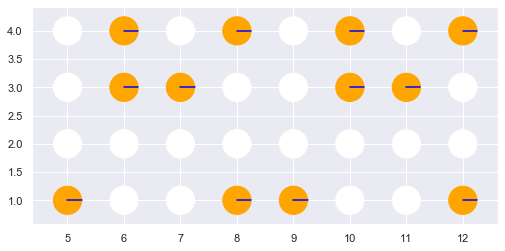

In [258]:
drawPhase(PP)